In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

In [154]:
# Import and read csv file 
df = pd.read_csv("../Project3-Luxurybags/Christies Hong Kong March 2025 Cleaned .csv")
# Display Dataframe
df


,Lot,Description,Brand,Type (All Lots),Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
0,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
1,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
2,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
3,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
4,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
237,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
238,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
239,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
240,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [155]:
# Extract Info on Data frame
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Lot                   242 non-null    int64 
 1   Description           242 non-null    object
 2   Brand                 242 non-null    object
 3   Type (All Lots)       242 non-null    object
 4   Year                  242 non-null    int64 
 5   Color                 242 non-null    object
 6   Leather               242 non-null    object
 7   Hardware              242 non-null    object
 8   Estimate (USD)        242 non-null    object
 9   Price Realized (USD)  242 non-null    int64 
dtypes: int64(3), object(7)
memory usage: 19.0+ KB
None


In [156]:
# Rename Type (All Lots) to Type
df.rename(columns={'Type (All Lots)': 'Type'}, inplace=True)
# Display Dataframe
df


,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
0,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
1,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
2,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
3,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
4,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
237,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
238,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
239,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
240,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [157]:
# Reset the Index making sure it starts at 1 instead of 0
df = df.reset_index(drop=True)  # Reset index and drop the old one
df.index = df.index + 1  # Start at 1
# Display Dataframe
df

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,"5,100−7,700",6100
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",9700
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,"7,700−12,800",12100
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,"2,600−3,800",2300
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,"5,100−7,700",5600
...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,"2,600−3,600",4800
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,"3,800−5,100",3500
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,"2,600−3,600",4200
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,"3,800−5,100",4800


In [158]:
# Split 'Estimate (USD)' into 'Lower Estimate' & 'Higher Estimate'
# Ensure consistent separator and remove commas
df["Estimate (USD)"] = df["Estimate (USD)"].str.replace(",", "", regex=True)
df[["Lower Estimate (USD)", "Higher Estimate (USD)"]] = df["Estimate (USD)"].str.split("−", expand=True)

# Convert to numeric instead of object
df["Lower Estimate (USD)"] = pd.to_numeric(df["Lower Estimate (USD)"])
df["Higher Estimate (USD)"] = pd.to_numeric(df["Higher Estimate (USD)"])

# Show results
df

,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Price Realized (USD),Lower Estimate (USD),Higher Estimate (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,6100,5100,7700
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,9700,7700,12800
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,12100,7700,12800
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2300,2600,3800
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5600,5100,7700
...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,4800,2600,3600
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3500,3800,5100
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,4200,2600,3600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,4800,3800,5100


In [159]:
# print new data info after adjustments were made 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 1 to 242
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Lot                    242 non-null    int64 
 1   Description            242 non-null    object
 2   Brand                  242 non-null    object
 3   Type                   242 non-null    object
 4   Year                   242 non-null    int64 
 5   Color                  242 non-null    object
 6   Leather                242 non-null    object
 7   Hardware               242 non-null    object
 8   Estimate (USD)         242 non-null    object
 9   Price Realized (USD)   242 non-null    int64 
 10  Lower Estimate (USD)   242 non-null    int64 
 11  Higher Estimate (USD)  242 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 22.8+ KB
None


In [160]:
# Reordering columns to place the price realized column at the end
columns_order = [
    "Lot", "Description", "Brand", "Type", "Year", "Color", "Leather", "Hardware",
    "Estimate (USD)", "Lower Estimate (USD)", "Higher Estimate (USD)", "Price Realized (USD)"
]

# Apply the new column order
df = df[columns_order]

# display to verify
df


,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD)
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600
...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800


In [161]:
# Add a new column categorizing price based on how sale results compare to estimates
def categorize_price(row):
    if pd.isna(row['Price Realized (USD)']) or row['Price Realized (USD)'] == 0:
        return 'No Sale' #If Price Realized is zero or nit mentioned display "No Sale"
    elif row['Price Realized (USD)'] < row['Lower Estimate (USD)']:
        return 'Below Estimate' #If Price Realized is under the lower estimate display "Below Estimate"
    elif row['Price Realized (USD)'] > row['Higher Estimate (USD)']:
        return 'Above Estimate' #If Price Realized is above the lower estimate display "Above Estimate"
    else:
        return 'Within Estimate' #If Price Realized is within the estimates display "Within Estimate"

df['Price Category'] = df.apply(categorize_price, axis=1)
# display dataframe
df


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/708171887.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate
...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate


In [162]:
# Add 'Variance from Estimate' column measuring price realized compared to the higher estimate
df['Variance from Higher Estimate'] = df['Price Realized (USD)'] - df['Higher Estimate (USD)']
#display dataframe
df

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/403065320.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMÈS,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate,-1600
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate,-3100
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMÈS,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate,-700
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMÈS,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate,-1500
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMÈS,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate,-2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate,1200
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate,-1600
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate,600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate,-300


In [163]:
#remove the french acent from the word Hermes in the brand column
df['Brand'] = df['Brand'].str.upper().str.strip().replace({'HERMÈS': 'HERMES'})
#display dataframe
df

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/401750262.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Lot,Description,Brand,Type,Year,Color,Leather,Hardware,Estimate (USD),Lower Estimate (USD),Higher Estimate (USD),Price Realized (USD),Price Category,Variance from Higher Estimate
1,1,LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...,HERMES,Mini Roulis,2022,Green,Evercolor,Palladium,5100−7700,5100,7700,6100,Within Estimate,-1600
2,2,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMES,"Kelly 32, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,9700,Within Estimate,-3100
3,3,LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...,HERMES,"Birkin 35, Limited Edition",2011,Yellow,Epsom,Palladium,7700−12800,7700,12800,12100,Within Estimate,-700
4,4,SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...,HERMES,Constance Wallet,2011,Yellow,Lizard,Palladium,2600−3800,2600,3800,2300,Below Estimate,-1500
5,5,NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO,HERMES,Constance To Go,2023,Yellow,Epsom,Gold,5100−7700,5100,7700,5600,Within Estimate,-2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,254,LIMITED EDITION PAINTED PUMPKIN MONOGRAM KEEPA...,LOUIS VUITTON,"Keepall Bandoulière 45, Limited Edition",2023,Multi Color,Canvas,Gold,2600−3600,2600,3600,4800,Above Estimate,1200
239,256,LIMITED EDITION BLACK TAURILLON LEATHER INFINI...,LOUIS VUITTON,"Christopher Backpack MM, Limited Edition",2023,Black,Taurillon,Black,3800−5100,3800,5100,3500,Below Estimate,-1600
240,257,ABSOLUTE BLACK MONOGRAM TAURILLON LEATHER KEEP...,LOUIS VUITTON,Keepall Bandoulière 50,2019,Black,Taurillon,Black & Orange,2600−3600,2600,3600,4200,Above Estimate,600
241,258,LIMITED EDITION BLACK EMPREINTE LEATHER TOTE B...,LOUIS VUITTON,"Tote Bag, Limited Edition",2008,Black,Empreinte,Black,3800−5100,3800,5100,4800,Within Estimate,-300


In [164]:
#Save the new dataframe in the repository
df.to_csv("../Project3-Luxurybags/Cleaned_Enhanced_Luxury_Bag_Data.csv", index=False)


In [165]:
import sqlite3

#Connect or create SQLite database
conn=sqlite3.connect("luxury_handbag_auctions.db")

#Save Dataframe as a table
df.to_sql("Christies_HongKong_March25_Sale",conn, if_exists="replace", index=False)

#test:show first few rows
print(pd.read_sql("SELECT * FROM Christies_HongKong_March25_Sale LIMIT 5", conn))

   Lot                                        Description   Brand  \
0    1  LIME EVERCOLOR LEATHER MINI ROULIS WITH PALLAD...  HERMES   
1    2  LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...  HERMES   
2    3  LIMITED EDITION LIME & PEARL GRAY EPSOM LEATHE...  HERMES   
3    4  SHINY MIMOSA NILOTICUS LIZARD SMALL CONSTANCE ...  HERMES   
4    5        NAPLES YELLOW EPSOM LEATHER CONSTANCE TO GO  HERMES   

                         Type  Year   Color    Leather   Hardware  \
0                 Mini Roulis  2022   Green  Evercolor  Palladium   
1   Kelly 32, Limited Edition  2011  Yellow      Epsom  Palladium   
2  Birkin 35, Limited Edition  2011  Yellow      Epsom  Palladium   
3            Constance Wallet  2011  Yellow     Lizard  Palladium   
4             Constance To Go  2023  Yellow      Epsom       Gold   

  Estimate (USD)  Lower Estimate (USD)  Higher Estimate (USD)  \
0      5100−7700                  5100                   7700   
1     7700−12800                  7700  

In [166]:
# # Query: Top 5 Hermès sales 
# query = """
# SELECT Brand, Description, `Price Realized (USD)`
# FROM Christies_HongKong_March25_Sale
# WHERE Brand = 'HERMES'
# ORDER BY `Price Realized (USD)` DESC
# LIMIT 5
# """

# top_hermes = pd.read_sql(query, conn)
# top_hermes


In [177]:
# Analyze average price realized of brands based on year 

# Create trend analysis DataFrame
AvePriceYear_df = df.groupby(['Brand', 'Year'])['Price Realized (USD)'].mean().reset_index()
AvePriceYear_df.rename(columns={'Price Realized (USD)': 'Average_Price_USD'}, inplace=True)

# Save trend analysis as a new table
AvePriceYear_df.to_sql("Brand_Year_Average_Prices", conn, if_exists="replace", index=False)

# Test: show first few rows of the new table
print("Trend analysis table:")
print(pd.read_sql("SELECT * FROM Brand_Year_Average_Prices LIMIT 5", conn))

Trend analysis table:
    Brand  Year  Average_Price_USD
0  CHANEL  1989        2600.000000
1  CHANEL  1996        1500.000000
2  CHANEL  1997        1900.000000
3  CHANEL  2006        1466.666667
4  CHANEL  2008        1550.000000


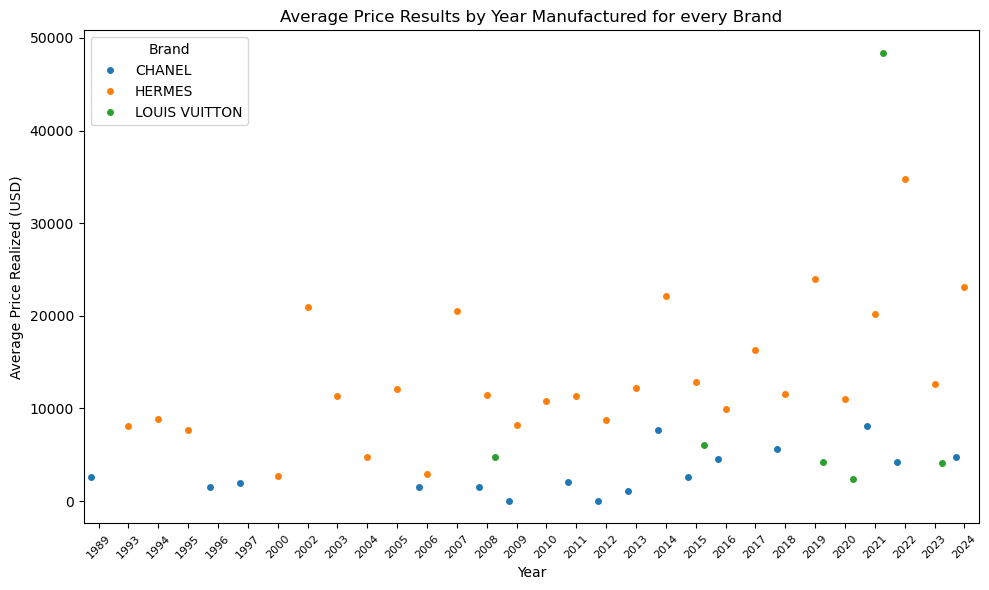

In [ ]:
# Plotting from the SQL database 
# Getting the data from SQL (though we already have it in trend_df)
db_AvePriceYear_df = pd.read_sql("SELECT * FROM Brand_Year_Average_Prices", conn)

# Plotting the dot chart
plt.figure(figsize=(10, 6))
sns.stripplot(data=AvePriceYear_df, x='Year', y='Average_Price_USD', hue='Brand', dodge=True)
plt.xticks(rotation=45, fontsize=8)
plt.title("Average Price Results by Year Manufactured for every Brand")
plt.ylabel("Average Price Realized (USD)")
plt.tight_layout()
# Display the chart
plt.show()

In [196]:
# Analyze price realized for each Brand based on Color
# Query the required data (Brand, Color, Price Realized)
query = """
    SELECT Brand, Color, `Price Realized (USD)` 
    FROM Christies_HongKong_March25_Sale
"""
PriceByColor = pd.read_sql(query, conn)

In [ ]:
# 2. Save the aggregated data back to the database as a new table
PriceByColor.to_sql(
    "PriceByColor", 
    conn, 
    if_exists="replace", 
    index=False
)
# Show Table
PriceByColor

,Brand,Color,Price Realized (USD)
0,HERMES,Green,6100
1,HERMES,Yellow,9700
2,HERMES,Yellow,12100
3,HERMES,Yellow,2300
4,HERMES,Yellow,5600
...,...,...,...
237,LOUIS VUITTON,Multi Color,4800
238,LOUIS VUITTON,Black,3500
239,LOUIS VUITTON,Black,4200
240,LOUIS VUITTON,Black,4800


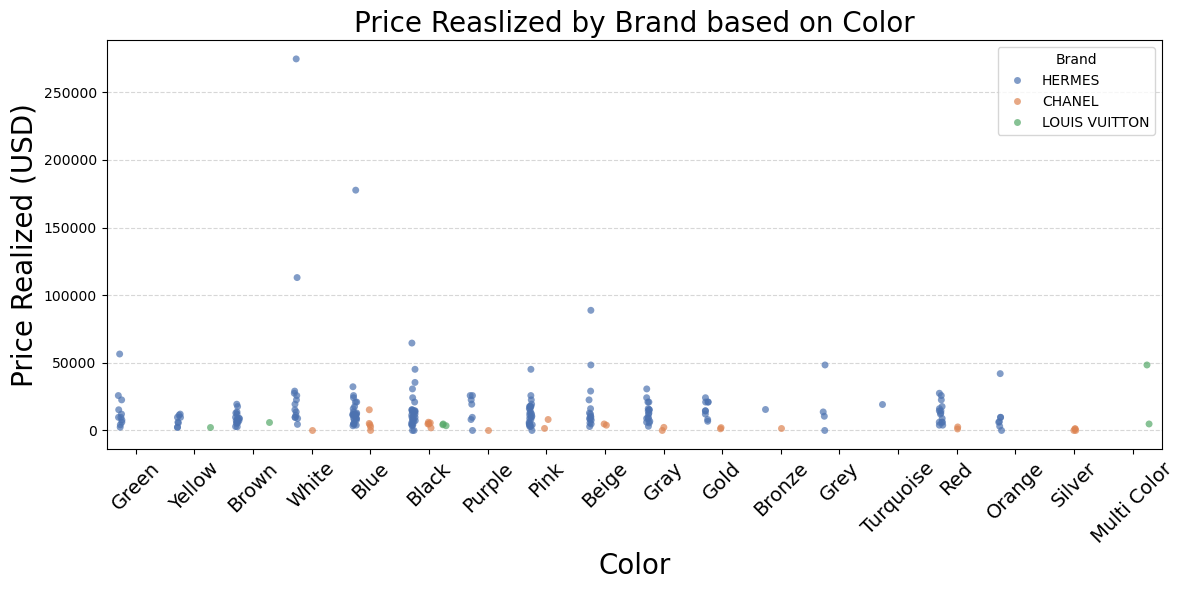

In [ ]:
# Generate the stripplot from the PriceByColorData
plt.figure(figsize=(12, 6))  # Wider figure for better readability
sns.stripplot(
    data=PriceByColor,
    x='Color',
    y='Price Realized (USD)',
    hue='Brand',
    dodge=True,  # Prevents overlapping points
    palette='deep',  # Better color distinction
    alpha=0.7  # Slight transparency for overlapping points
)

# Format the plot
# Add title and lables
plt.title("Price Reaslized by Brand based on Color", fontsize=20)
plt.xlabel("Color", fontsize= 20)
plt.ylabel("Price Realized (USD)", fontsize=20)
plt.xticks(rotation=45, fontsize=14)  # Rotate x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.5)  # Add faint gridlines for reference
plt.tight_layout()  # Prevent label cutoff

# Display the chart
plt.show()

In [ ]:
# Average Price Realized for Brands By Color
# Calculate average prices by querying the database
query = """
SELECT 
    Brand, 
    Color, 
    AVG(`Price Realized (USD)`) as `Average_Price_USD`
FROM 
    Christies_HongKong_March25_Sale
GROUP BY 
    Brand, Color
"""
AveragePriceColor_df = pd.read_sql(query, conn)

# 2. Save the aggregated data back to the database as a new table
AveragePriceColor_df.to_sql(
    "Brand_Color_Average_Prices", 
    conn, 
    if_exists="replace", 
    index=False
)

# 3. Generate the visualization
plt.figure(figsize=(12, 6))
sns.stripplot(
    data=AveragePriceColor_df,
    x='Color',
    y='Average_Price_USD',
    hue='Brand',
    dodge=True,
    palette='viridis',
    size=8,
    alpha=0.8
)

# Formatting
plt.title("Average Price Realized by Brand and Color", fontsize=14)
plt.xlabel("Color", fontsize=12)
plt.ylabel("Average Price (USD)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()

# Display the chart
plt.show()

# Close the database connection
conn.close()

In [194]:
#Average Price Realized for Brands By Color
AveragePriceColor_df = df.groupby(['Brand', 'Color'])['Price Realized (USD)'].mean().reset_index()
AveragePriceColor_df

,Brand,Color,Price Realized (USD)
0,CHANEL,Beige,4350.000000
1,CHANEL,Black,4640.000000
2,CHANEL,Blue,5480.000000
3,CHANEL,Bronze,1800.000000
4,CHANEL,Gold,1650.000000
5,CHANEL,Gray,1150.000000
6,CHANEL,Pink,4800.000000
7,CHANEL,Purple,0.000000
8,CHANEL,Red,1850.000000
9,CHANEL,Silver,600.000000


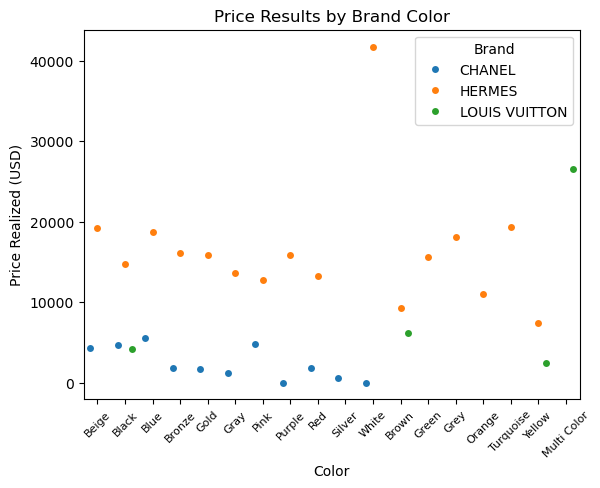

In [195]:
# Price Results by Brand Color
#plotting the dot chart
sns.stripplot(data= AveragePriceColor_df, x='Color', y='Price Realized (USD)', hue='Brand', dodge=True)
# Adjusting the x-axis ticks byrotating labels and displaying a smaller font size
plt.xticks(rotation=45, fontsize=8) 
#add title
plt.title("Price Results by Brand Color")
#displaying teh chart
plt.show()

In [ ]:
#Find the Average Summary 
# Ensure Price Realised is numeric
df['Price Realized (USD)'] = pd.to_numeric(df['Price Realized (USD)'], errors='coerce')

# Calculate the average price realised per brand
brand_avg = df.groupby('Brand', as_index=False)['Price Realized (USD)'].mean()

# Sort from highest to lowest
brand_avg = brand_avg.sort_values(by='Price Realized (USD)', ascending=False)

# Preview results
print(brand_avg.head())


           Brand  Price Realized (USD)
1         HERMES          16349.038462
2  LOUIS VUITTON          10600.000000
0         CHANEL           3051.851852


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/1828427418.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price Realized (USD)'] = pd.to_numeric(df['Price Realized (USD)'], errors='coerce')


In [112]:
# Create a bar chart to study the average auction price by brand
alt.Chart(brand_avg).mark_bar().encode(
    
    # Set the x-axis to display brand names as categorical (Nominal: 'N')
    # Sort brands in descending order by price
    x=alt.X('Brand:N', sort='-y', axis=alt.Axis(labelAngle=0)),  # Keep labels horizontal
    
    # Set the y-axis to represent the realized price in USD as a quantitative value ('Q')
    y='Price Realized (USD):Q',
    
    # Add tooltips to show brand and price when hovering over bars
    tooltip=['Brand', 'Price Realized (USD)']

).properties(
    
    # Set the chart title
    title='Average Price Realized by Brand',
    
    # Define the chart dimensions (width and height in pixels)
    width=600,
    height=400
)


/opt/anaconda3/lib/python3.12/site-packages/altair/utils/core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/4141445648.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Price Category', palette='coolwarm')


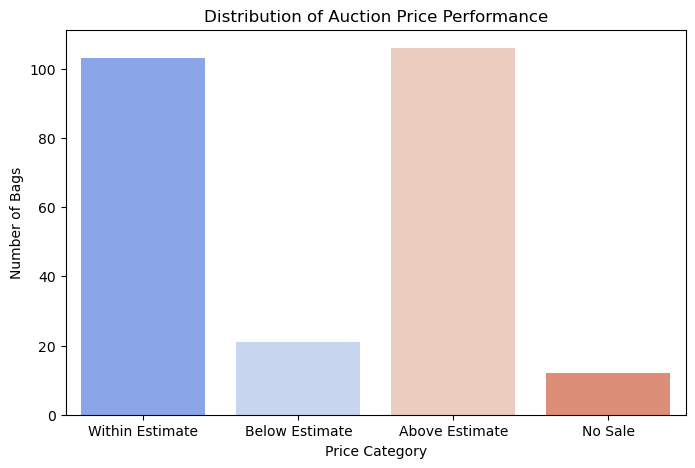

In [113]:
# Create a figure with a specified size (8 inches wide, 5 inches tall)
plt.figure(figsize=(8,5))

# Create a count plot to visualize the distribution of 'Price Category'
# 'data=df' → Use the DataFrame `df`
# 'x="Price Category"' → Set the x-axis to display different price categories
# 'palette="coolwarm"' → Use the 'coolwarm' color scheme for the bars
sns.countplot(data=df, x='Price Category', palette='coolwarm')

# Set the title of the chart
plt.title("Distribution of Auction Price Performance")

# Label the y-axis as 'Number of Bags'
plt.ylabel("Number of Bags")

# Label the x-axis as 'Price Category'
plt.xlabel("Price Category")

# Display the plot
plt.show()


/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/1411300410.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


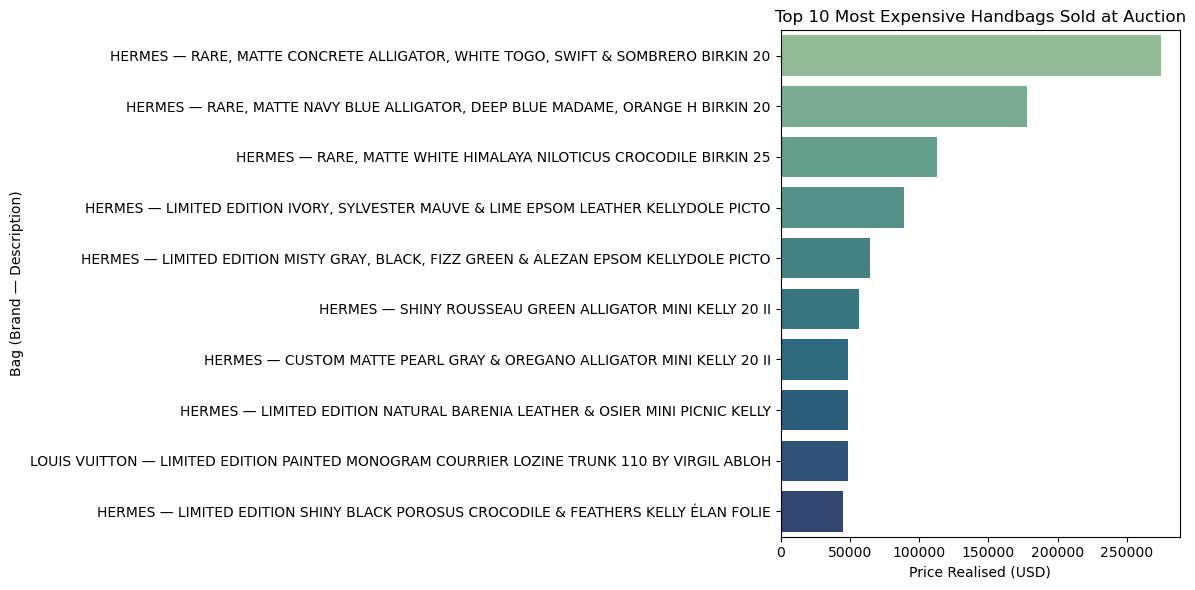

In [ ]:
# Display the top 10 sales with brand and description
top_10_sales = df.sort_values(by='Price Realized (USD)', ascending=False).head(10)

# Display the top 10 sales with brand and description
top_10_sales[['Brand', 'Description', 'Price Realized (USD)']]
# Create a new label column
top_10_sales['Bag Label'] = top_10_sales['Brand'] + " — " + top_10_sales['Description']

# Plot the bar chart
plt.figure(figsize=(12,6))
sns.barplot(
    data=top_10_sales,
    y='Bag Label',
    x='Price Realized (USD)',
    palette='crest'
)
#Add Title
plt.title("Top 10 Most Expensive Handbags Sold at Auction")
#Lable the x and y axis
plt.xlabel("Price Realised (USD)")
plt.ylabel("Bag (Brand — Description)")
#Adjust Layout
plt.tight_layout()
#show chart
plt.show()


In [ ]:
#create a table displaying the works passed
works_passed = df.sort_values(by='Price Realized (USD)', ascending=True).head(12)

# Create a label combining Brand and Description
works_passed['Bag Label'] = works_passed['Brand'] + " — " + works_passed['Type']

# Preview the result
works_passed[['Brand','Type','Color', 'Estimate (USD)',]]


,Brand,Type,Color,Estimate (USD)
216,CHANEL,Wallet on Chain,Blue,2000−3100
215,CHANEL,Medium Boy Bag,Purple,2600−3800
180,HERMES,"Harlequin Birkin 35, Limited Edition",Purple,7700−12800
224,CHANEL,Half Moon Clutch,Silver,1500−2300
202,HERMES,Bolide 27,Orange,5100−7700
222,CHANEL,Wallet on Chain,White,2000−3100
212,CHANEL,Camellia Pochette,Silver,2000−3100
223,CHANEL,Wallet on Chain,Gray,2000−3100
105,HERMES,"Mini Kelly 20 II, Limited Edition",Black,38400−51200
99,HERMES,"Clutch, Limited Edition",Black,5100−7700


In [ ]:
#create a visualization for the above , order by estimate 
#create a visualization for the lowest 10 price realized without the 0 

/var/folders/1m/7n3mw1wj3ml7gf8rmsjswdrr0000gn/T/ipykernel_66125/1762890199.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


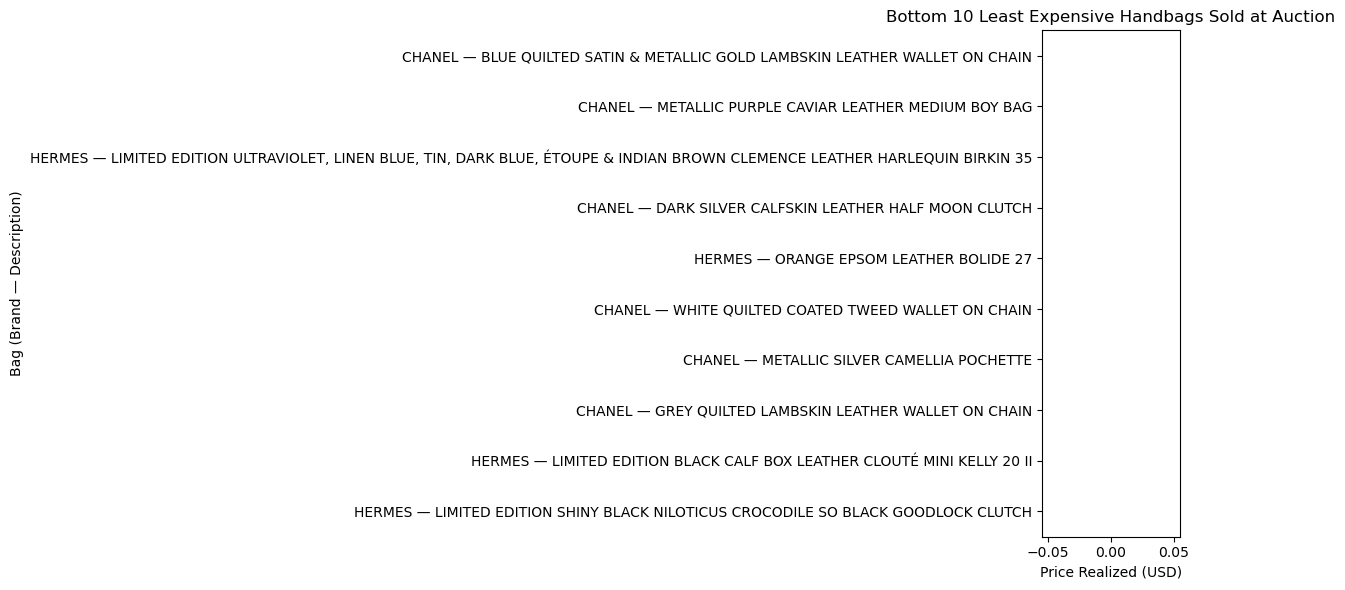

In [80]:

plt.figure(figsize=(12,6))

# Plot a bar chart for bottom 10 bags
sns.barplot(
    data=bottom_10_sales,
    y='Bag Label',
    x='Price Realized (USD)',
    palette='Reds'
)

plt.title("Bottom 10 Least Expensive Handbags Sold at Auction")
plt.xlabel("Price Realized (USD)")
plt.ylabel("Bag (Brand — Description)")
plt.tight_layout()
plt.show()


In [140]:

import plotly.express as px


# Calculate average price realized per brand
brand_avg = df.groupby("Brand")["Price Realized (USD)"].mean().reset_index()

# Create an interactive bar chart
fig = px.bar(
    brand_avg, 
    x="Brand", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)", 
    title="Average Auction Price by Brand",
    labels={"Price Realized (USD)": "Avg Price (USD)"},
    color="Brand",
)

# Customize layout
fig.update_traces(texttemplate='%{text:.2f}', textposition='outside')
fig.update_layout(xaxis_tickangle=0, yaxis_title="Avg Price (USD)", xaxis_title="Brand")

# Show the interactive chart
fig.show()

In [137]:
import plotly.express as px

# Calculate average price realized per color, round to 2 decimals, and sort descending
brand_avg = (df.groupby("Color")["Price Realized (USD)"]
              .mean()
              .round(2)  # Round to 2 decimal places
              .reset_index()
              .sort_values("Price Realized (USD)", ascending=False))

# Create an interactive bar chart with uniform color
fig = px.bar(
    brand_avg, 
    x="Color", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)",  # This will now show the rounded values
    title="Average Auction Price by Color (Highest to Lowest)",
    labels={"Price Realized (USD)": "Avg Price (USD)"},
    color_discrete_sequence=['#1f77b5']  # Single color for all bars
)

# Customize layout
fig.update_traces(
    texttemplate='%{text:,.2f}',  # Format with commas and 2 decimals
    textposition='outside',
    marker_color='#1f78b4'  # Ensures color consistency
)
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Avg Price (USD)",
    xaxis_title="Color",
    showlegend=False  # Hides legend since all bars are same color
)

# Show the interactive chart
fig.show()

In [139]:
import plotly.express as px

# Calculate average price realized per color, round to 2 decimals, and sort descending
brand_avg = (df.groupby("Leather")["Price Realized (USD)"]
              .mean()
              .round(2)  # Round to 2 decimal places
              .reset_index()
              .sort_values("Price Realized (USD)", ascending=False))

# Create an interactive bar chart with uniform color
fig = px.bar(
    brand_avg, 
    x="Leather", 
    y="Price Realized (USD)", 
    text="Price Realized (USD)",  # This will now show the rounded values
    title="Average Auction Price by Leather",
    labels={"Price Realized (USD)": "Avg Price (USD)"},
    color_discrete_sequence=['#1f77b4']  # Single color for all bars
)

# Customize layout
fig.update_traces(
    texttemplate='%{text:,.2f}',  # Format with commas and 2 decimals
    textposition='outside',
    marker_color='#1f77b4'  # Ensures color consistency
)
fig.update_layout(
    xaxis_tickangle=-45,
    yaxis_title="Avg Price (USD)",
    xaxis_title="Color",
    showlegend=False  # Hides legend since all bars are same color
)

# Show the interactive chart
fig.show()

In [ ]:
# Close the connection to the database
conn.close()

In [143]:
from flask import Flask, render_template, jsonify
import pandas as pd

app = Flask(__name__)



# Database connection
def connect_db():
    conn = sqlite3.connect('luxury_bags.db')
    conn.row_factory = sqlite3.Row
    return conn

@app.route("/")
def index():
    """Render the main HTML page"""
    return render_template("index.html")

@app.route("/data")
def get_data():
    """Provide auction data as JSON for frontend"""
    data = df.to_dict(orient="records")  # Convert DataFrame to list of dicts
    return jsonify(data)

if __name__ == "__main__":
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

In [ ]:
PASTE THIS INTO HTML 


Starting Flask on port 5001...
 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5001
Press CTRL+C to quit
 * Restarting with watchdog (fsevents)
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
Traceback (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1074, in launch_instance
    app.initialize(argv)
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 118, in inner
    return method(app, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  Fil

SystemExit: 1

In [ ]:
# #Altair for visualizations 
# pip install altair
# import altair as alt

# alt.Chart(df).mark_line().encode(
#     x='Collection/Year:O',
#     y='Price Realised (USD):Q',
#     color='Brand:N'
# ).interactive()


In [ ]:
# pip install folium
# import folium

# m = folium.Map(location=[22.3, 114.2], zoom_start=5)  # Hong Kong

# folium.Marker([22.3, 114.2], popup="Christie's HK - Total Sales: $200,000").add_to(m)

# m


In [ ]:
# pip install streamlit
# # Save this in streamlit_app.py
# import streamlit as st
# import pandas as pd

# df = pd.read_csv("cleaned_luxury_bag_data.csv")

# brand = st.selectbox("Choose Brand", df['Brand'].unique())
# filtered = df[df['Brand'] == brand]

# st.line_chart(filtered.groupby("Collection/Year")["Price Realised (USD)"].mean())
# streamlit run streamlit_app.py
